<a href="https://colab.research.google.com/github/athulunni5050/brain-tumor/blob/main/brain_tumor_classification_and_prediction_full_exp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# PACKAGES AND LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D
from keras import models
from keras import layers
import tensorflow as tf
import os
import os.path
from pathlib import Path
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from keras.optimizers import RMSprop,Adam

#### IGNORING WARNINGS

In [ ]:
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

# PATH PROCESS

#### TRAIN

In [ ]:
#Train_Data_Path = Path("../input/brain-tumor-classification-mri/Training")
Train_Data_Path = Path("/content/drive/MyDrive/Brain Tumor/Training")

In [ ]:
Train_JPG_Path = list(Train_Data_Path.glob(r"*/*.jpg"))

In [ ]:
print(Train_JPG_Path[0:10])
#/content/drive/MyDrive/Brain Tumor/Testing/glioma_tumor/image(1).jpg

[PosixPath('/content/drive/MyDrive/Brain Tumor/Training/no_tumor/2.jpg'), PosixPath('/content/drive/MyDrive/Brain Tumor/Training/no_tumor/4.jpg'), PosixPath('/content/drive/MyDrive/Brain Tumor/Training/no_tumor/1.jpg'), PosixPath('/content/drive/MyDrive/Brain Tumor/Training/no_tumor/5.jpg'), PosixPath('/content/drive/MyDrive/Brain Tumor/Training/no_tumor/3.jpg'), PosixPath('/content/drive/MyDrive/Brain Tumor/Training/no_tumor/image (24).jpg'), PosixPath('/content/drive/MyDrive/Brain Tumor/Training/no_tumor/image (35).jpg'), PosixPath('/content/drive/MyDrive/Brain Tumor/Training/no_tumor/image (23).jpg'), PosixPath('/content/drive/MyDrive/Brain Tumor/Training/no_tumor/image (32).jpg'), PosixPath('/content/drive/MyDrive/Brain Tumor/Training/no_tumor/image (21).jpg')]


In [ ]:
Train_JPG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Train_JPG_Path))

In [ ]:
print("NO: ",Train_JPG_Labels.count("no_tumor"))
print("Pituitary: ",Train_JPG_Labels.count("pituitary_tumor"))
print("Meningioma: ",Train_JPG_Labels.count("meningioma_tumor"))
print("Glioma: ",Train_JPG_Labels.count("glioma_tumor"))

NO:  395
Pituitary:  843
Meningioma:  822
Glioma:  826


In [ ]:
Train_JPG_Path_Series = pd.Series(Train_JPG_Path,name="JPG").astype(str)
Train_JPG_Labels_Series = pd.Series(Train_JPG_Labels, name="TUMOR_CATEGORY")

In [ ]:
print(Train_JPG_Path_Series.head())
print("-----"*20)
print(Train_JPG_Labels_Series.head())

0    /content/drive/MyDrive/Brain Tumor/Training/no...
1    /content/drive/MyDrive/Brain Tumor/Training/no...
2    /content/drive/MyDrive/Brain Tumor/Training/no...
3    /content/drive/MyDrive/Brain Tumor/Training/no...
4    /content/drive/MyDrive/Brain Tumor/Training/no...
Name: JPG, dtype: object
----------------------------------------------------------------------------------------------------
0    no_tumor
1    no_tumor
2    no_tumor
3    no_tumor
4    no_tumor
Name: TUMOR_CATEGORY, dtype: object


In [ ]:
Main_Train_Data = pd.concat([Train_JPG_Path_Series,Train_JPG_Labels_Series],axis=1)

In [ ]:
print(Main_Train_Data.head())

                                                 JPG TUMOR_CATEGORY
0  /content/drive/MyDrive/Brain Tumor/Training/no...       no_tumor
1  /content/drive/MyDrive/Brain Tumor/Training/no...       no_tumor
2  /content/drive/MyDrive/Brain Tumor/Training/no...       no_tumor
3  /content/drive/MyDrive/Brain Tumor/Training/no...       no_tumor
4  /content/drive/MyDrive/Brain Tumor/Training/no...       no_tumor


#### TEST

In [ ]:
Test_Data_Path = Path("/content/drive/MyDrive/Brain Tumor/Testing")

In [ ]:
Test_JPG_Path = list(Test_Data_Path.glob(r"*/*.jpg"))

In [ ]:
print(Test_JPG_Path[0:5])

[PosixPath('/content/drive/MyDrive/Brain Tumor/Testing/glioma_tumor/image(1).jpg'), PosixPath('/content/drive/MyDrive/Brain Tumor/Testing/glioma_tumor/image(100).jpg'), PosixPath('/content/drive/MyDrive/Brain Tumor/Testing/glioma_tumor/image(12).jpg'), PosixPath('/content/drive/MyDrive/Brain Tumor/Testing/glioma_tumor/image(13).jpg'), PosixPath('/content/drive/MyDrive/Brain Tumor/Testing/glioma_tumor/image(11).jpg')]


In [ ]:
Test_JPG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Test_JPG_Path))

In [ ]:
print("NO: ",Test_JPG_Labels.count("no_tumor"))
print("Pituitary: ",Test_JPG_Labels.count("pituitary_tumor"))
print("Meningioma: ",Test_JPG_Labels.count("meningioma_tumor"))
print("Glioma: ",Test_JPG_Labels.count("glioma_tumor"))

NO:  105
Pituitary:  74
Meningioma:  115
Glioma:  100


In [ ]:
Test_JPG_Path_Series = pd.Series(Test_JPG_Path,name="JPG").astype(str)
Test_JPG_Labels_Labels = pd.Series(Test_JPG_Labels,name="TUMOR_CATEGORY")

In [ ]:
print(Test_JPG_Path_Series.head())
print("-----"*20)
print(Test_JPG_Labels_Labels.head())

0    /content/drive/MyDrive/Brain Tumor/Testing/gli...
1    /content/drive/MyDrive/Brain Tumor/Testing/gli...
2    /content/drive/MyDrive/Brain Tumor/Testing/gli...
3    /content/drive/MyDrive/Brain Tumor/Testing/gli...
4    /content/drive/MyDrive/Brain Tumor/Testing/gli...
Name: JPG, dtype: object
----------------------------------------------------------------------------------------------------
0    glioma_tumor
1    glioma_tumor
2    glioma_tumor
3    glioma_tumor
4    glioma_tumor
Name: TUMOR_CATEGORY, dtype: object


In [ ]:
Main_Test_Data = pd.concat([Test_JPG_Path_Series,Test_JPG_Labels_Labels],axis=1)

In [ ]:
print(Main_Test_Data.head())

                                                 JPG TUMOR_CATEGORY
0  /content/drive/MyDrive/Brain Tumor/Testing/gli...   glioma_tumor
1  /content/drive/MyDrive/Brain Tumor/Testing/gli...   glioma_tumor
2  /content/drive/MyDrive/Brain Tumor/Testing/gli...   glioma_tumor
3  /content/drive/MyDrive/Brain Tumor/Testing/gli...   glioma_tumor
4  /content/drive/MyDrive/Brain Tumor/Testing/gli...   glioma_tumor


# SHUFFLING

In [ ]:
Main_Train_Data = Main_Train_Data.sample(frac=1).reset_index(drop=True)
Main_Test_Data = Main_Test_Data.sample(frac=1).reset_index(drop=True)

In [ ]:
print(Main_Train_Data.head(10))
print("----"*20)
print(Main_Test_Data.head(10))

                                                 JPG   TUMOR_CATEGORY
0  /content/drive/MyDrive/Brain Tumor/Training/pi...  pituitary_tumor
1  /content/drive/MyDrive/Brain Tumor/Training/pi...  pituitary_tumor
2  /content/drive/MyDrive/Brain Tumor/Training/gl...     glioma_tumor
3  /content/drive/MyDrive/Brain Tumor/Training/pi...  pituitary_tumor
4  /content/drive/MyDrive/Brain Tumor/Training/gl...     glioma_tumor
5  /content/drive/MyDrive/Brain Tumor/Training/gl...     glioma_tumor
6  /content/drive/MyDrive/Brain Tumor/Training/gl...     glioma_tumor
7  /content/drive/MyDrive/Brain Tumor/Training/no...         no_tumor
8  /content/drive/MyDrive/Brain Tumor/Training/gl...     glioma_tumor
9  /content/drive/MyDrive/Brain Tumor/Training/gl...     glioma_tumor
--------------------------------------------------------------------------------
                                                 JPG    TUMOR_CATEGORY
0  /content/drive/MyDrive/Brain Tumor/Testing/gli...      glioma_tumor
1  /con

# REPLACE NAME

In [ ]:
Main_Train_Data["TUMOR_CATEGORY"].replace({"glioma_tumor":"Glioma",
                                         "meningioma_tumor":"Meningioma",
                                         "no_tumor":"No",
                                         "pituitary_tumor":"Pituitary"},inplace=True)

In [ ]:
print(Main_Train_Data.head())

                                                 JPG TUMOR_CATEGORY
0  /content/drive/MyDrive/Brain Tumor/Training/pi...      Pituitary
1  /content/drive/MyDrive/Brain Tumor/Training/pi...      Pituitary
2  /content/drive/MyDrive/Brain Tumor/Training/gl...         Glioma
3  /content/drive/MyDrive/Brain Tumor/Training/pi...      Pituitary
4  /content/drive/MyDrive/Brain Tumor/Training/gl...         Glioma


In [ ]:
Main_Test_Data["TUMOR_CATEGORY"].replace({"glioma_tumor":"Glioma",
                                         "meningioma_tumor":"Meningioma",
                                         "no_tumor":"No",
                                         "pituitary_tumor":"Pituitary"},inplace=True)

In [ ]:
print(Main_Test_Data.head())

                                                 JPG TUMOR_CATEGORY
0  /content/drive/MyDrive/Brain Tumor/Testing/gli...         Glioma
1  /content/drive/MyDrive/Brain Tumor/Testing/no_...             No
2  /content/drive/MyDrive/Brain Tumor/Testing/pit...      Pituitary
3  /content/drive/MyDrive/Brain Tumor/Testing/gli...         Glioma
4  /content/drive/MyDrive/Brain Tumor/Testing/no_...             No


# VISUALIZATION

#### TRAIN

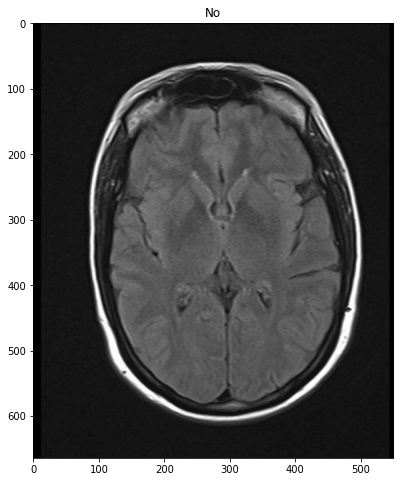

In [ ]:
figure = plt.figure(figsize=(8,8))
plt.imshow(plt.imread(Main_Train_Data["JPG"][10],0))
plt.title(Main_Train_Data["TUMOR_CATEGORY"][10])
plt.show()

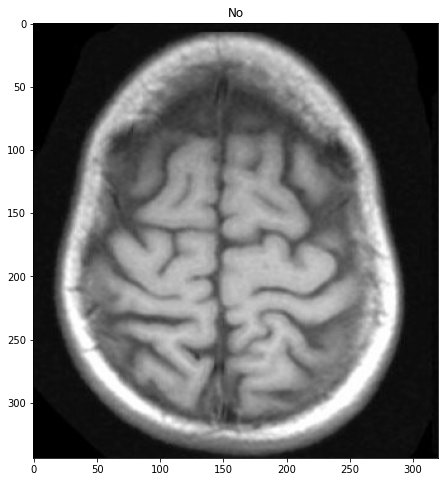

In [ ]:
figure = plt.figure(figsize=(8,8))
plt.imshow(plt.imread(Main_Train_Data["JPG"][7],0))
plt.title(Main_Train_Data["TUMOR_CATEGORY"][7])
plt.show()

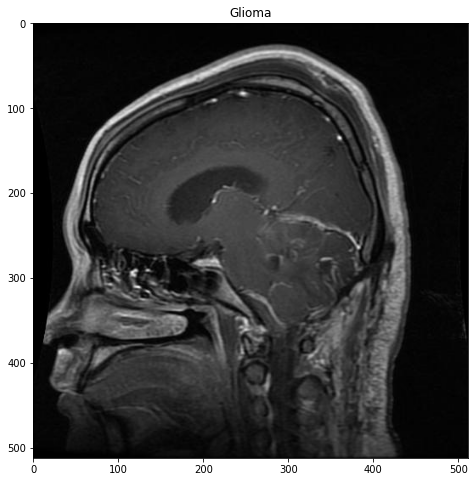

In [ ]:
figure = plt.figure(figsize=(8,8))
plt.imshow(plt.imread(Main_Train_Data["JPG"][200],0))
plt.title(Main_Train_Data["TUMOR_CATEGORY"][200])
plt.show()

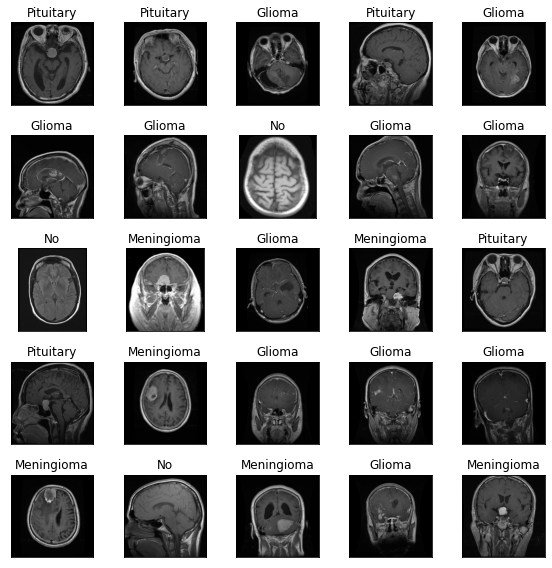

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(8, 8),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Train_Data["JPG"][i]))
    ax.set_title(Main_Train_Data["TUMOR_CATEGORY"][i])
plt.tight_layout()
plt.show()

In [ ]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, **options)
    Split arrays or matrices into random train and test subsets
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float, int or None, optional (default=None)
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        complement of the train size. If ``train_s

# MODEL TRAINING DATA

In [ ]:
train_data,test_data = train_test_split(Main_Train_Data,train_size=0.9,random_state=42)

In [ ]:
print(train_data.shape)

(2597, 2)


In [ ]:
print(test_data.shape)

(289, 2)


# IMAGE GENERATOR

In [ ]:
Generator = ImageDataGenerator(rescale=1./255,
                               brightness_range=[0.2,0.9],
                               featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=0,
        zoom_range = 0,
        width_shift_range=0,  
        height_shift_range=0, validation_split=0.1)

In [ ]:
Train_Set = Generator.flow_from_dataframe(dataframe=train_data,
                                         x_col="JPG",
                                         y_col="TUMOR_CATEGORY",
                                         seed=42,
                                          color_mode="rgb",
                                         class_mode="categorical",
                                          batch_size=10,
                                         subset="training"
                                         )

Found 2338 validated image filenames belonging to 4 classes.


In [ ]:
print(Train_Set.class_indices)
print(Train_Set.classes[0:5])
print(Train_Set.image_shape)

{'Glioma': 0, 'Meningioma': 1, 'No': 2, 'Pituitary': 3}
[0, 1, 1, 0, 2]
(256, 256, 3)


In [ ]:
Validation_Set = Generator.flow_from_dataframe(dataframe=train_data,
                                              x_col="JPG",
                                              y_col="TUMOR_CATEGORY",
                                              seed=42,
                                               color_mode="rgb",
                                              class_mode="categorical",
                                              batch_size=10,
                                               subset="validation"
                                              )

Found 259 validated image filenames belonging to 4 classes.


In [ ]:
print(Validation_Set.class_indices)
print(Validation_Set.classes[0:5])
print(Validation_Set.image_shape)

{'Glioma': 0, 'Meningioma': 1, 'No': 2, 'Pituitary': 3}
[1, 0, 3, 0, 2]
(256, 256, 3)


In [ ]:
Test_Set = Generator.flow_from_dataframe(dataframe=test_data,
                                              x_col="JPG",
                                              y_col="TUMOR_CATEGORY",
                                              seed=42,
                                               color_mode="rgb",
                                              class_mode="categorical",
                                              batch_size=10
                                              )

Found 289 validated image filenames belonging to 4 classes.


In [ ]:
print(Test_Set.class_indices)
print(Test_Set.classes[0:5])
print(Test_Set.image_shape)

{'Glioma': 0, 'Meningioma': 1, 'No': 2, 'Pituitary': 3}
[0, 2, 1, 3, 0]
(256, 256, 3)


In [ ]:
help(Conv2D)

# MODEL

In [ ]:
Model = Sequential()
#
Model.add(Conv2D(filters = 64, kernel_size = (3,3), 
                 activation ='relu', input_shape = (256,256,3)))
Model.add(MaxPool2D(pool_size=(2,2)))
Model.add(Dropout(0.2))

#
Model.add(Conv2D(filters = 128, kernel_size = (3,3), 
                 activation ='relu'))
Model.add(MaxPool2D(pool_size=(2,2)))
Model.add(Dropout(0.2))

#
Model.add(Conv2D(filters = 128, kernel_size = (3,3), 
                 activation ='relu'))
Model.add(MaxPool2D(pool_size=(2,2)))
Model.add(Dropout(0.2))

#
Model.add(Conv2D(filters = 128, kernel_size = (3,3), 
                 activation ='relu'))
Model.add(MaxPool2D(pool_size=(2,2)))
Model.add(Dropout(0.2))

# 
Model.add(Flatten())
Model.add(Dense(256, activation = "relu"))
Model.add(Dropout(0.25))
Model.add(Dense(4, activation = "softmax"))

In [ ]:
Model.compile(optimizer=RMSprop(lr=0.001),
             loss="categorical_crossentropy",
             metrics=["accuracy"])

In [ ]:
Call_Back = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=2,mode="min")

In [ ]:
ANN_Model = Model.fit(Train_Set,
                      validation_data=Validation_Set,
                     epochs=50,
                      batch_size=20,
                     callbacks=Call_Back)

Epoch 1/50
234/234 [==============================] - 605s 3s/step - loss: 1.1593 - accuracy: 0.5073 - val_loss: 0.8935 - val_accuracy: 0.6564
Epoch 2/50
234/234 [==============================] - 20s 86ms/step - loss: 0.8167 - accuracy: 0.6694 - val_loss: 0.7790 - val_accuracy: 0.7066
Epoch 3/50
234/234 [==============================] - 20s 86ms/step - loss: 0.6020 - accuracy: 0.7720 - val_loss: 0.6601 - val_accuracy: 0.7413
Epoch 4/50
234/234 [==============================] - 20s 86ms/step - loss: 0.4867 - accuracy: 0.8246 - val_loss: 0.5717 - val_accuracy: 0.7838
Epoch 5/50
234/234 [==============================] - 20s 86ms/step - loss: 0.3968 - accuracy: 0.8614 - val_loss: 0.6240 - val_accuracy: 0.7799
Epoch 6/50
234/234 [==============================] - 20s 85ms/step - loss: 0.3386 - accuracy: 0.8837 - val_loss: 0.6159 - val_accuracy: 0.8031
Epoch 7/50
234/234 [==============================] - 20s 84ms/step - loss: 0.2852 - accuracy: 0.8952 - val_loss: 0.6253 - val_accuracy: 

In [ ]:
Model_Results = Model.evaluate(Test_Set,verbose=False)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

In [ ]:
# Calling `save('my_model')` creates a SavedModel folder `my_model`.
Model.save("my_model")
Model.save_weights('model_weights.h5')

#It can be used to reconstruct the model identically.
#reconstructed_model = keras.models.load_model("my_model")
print(Model.summary())

In [ ]:
plt.plot(ANN_Model.history["accuracy"])
plt.plot(ANN_Model.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

In [ ]:
HistoryDict = ANN_Model.history

val_losses = HistoryDict["val_loss"]
val_acc = HistoryDict["val_accuracy"]
acc = HistoryDict["accuracy"]
losses = HistoryDict["loss"]
epochs = range(1,len(val_losses)+1)

In [ ]:
plt.plot(epochs,val_losses,"k-",label="LOSS")
plt.plot(epochs,val_acc,"r",label="ACCURACY")
plt.title("LOSS & ACCURACY")
plt.xlabel("EPOCH")
plt.ylabel("Loss & Acc")
plt.legend()
plt.show()

In [ ]:
plt.plot(epochs,losses,"k-",label="LOSS")
plt.plot(epochs,val_losses,"r",label="LOSS VAL")
plt.title("LOSS & LOSS VAL")
plt.xlabel("EPOCH")
plt.ylabel("LOSS & LOSS VAL")
plt.legend()
plt.show()

In [ ]:
Dict_Summary = pd.DataFrame(ANN_Model.history)
Dict_Summary.plot()

# PREDICTION PROCESS

In [ ]:
Main_Test_Set = Generator.flow_from_dataframe(dataframe=Main_Test_Data,
                                              x_col="JPG",
                                              y_col="TUMOR_CATEGORY",
                                              seed=42,
                                               color_mode="rgb",
                                              class_mode="categorical",
                                              batch_size=20
                                              )

In [ ]:
Model_Predict = Model.predict(Main_Test_Set)

In [ ]:
Model_Predict = np.argmax(Model_Predict,axis=1)

In [ ]:
Predict_Label = (Main_Test_Set.class_indices)
Predict_Label = dict((v,k) for k,v in Predict_Label.items())

In [ ]:
Model_Predict = [Predict_Label[k] for k in Model_Predict]

In [ ]:
print(Model_Predict[:50])

In [ ]:
Test_Results = list(Main_Test_Data["TUMOR_CATEGORY"])

In [ ]:
print(Test_Results[:50])

In [ ]:
Class_Report = classification_report(Test_Results,Model_Predict)
print(Class_Report)

In [ ]:
Conf_Report = confusion_matrix(Test_Results,Model_Predict, normalize="true")
figure = plt.figure(figsize=(10,10))
sns.heatmap(Conf_Report,vmax=1,center=0,vmin=-1,annot=True)
plt.show()

In [ ]:
fig, axes = plt.subplots(nrows=8,
                         ncols=8,
                         figsize=(20, 20),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Test_Data["JPG"].iloc[i]))
    ax.set_title(f"TEST:{Main_Test_Data.TUMOR_CATEGORY.iloc[i]}\n PREDICTION:{Model_Predict[i]}")
plt.tight_layout()
plt.show()

In [ ]:
from google.colab import files
 
uploaded = files.upload()
 
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [ ]:
fn

In [ ]:
#path = "/content/"+fn
import keras
from keras import models
#reconstructed_model = keras.models.load_model("my_model")
#Predict = reconstructed_model.predict(Main_Test_Set 0)

In [ ]:
#Model.save("my_model")

In [ ]:
#reconstructed_model = keras.models.load_model("my_model")

#

In [ ]:
type(Main_Test_Set)
Main_Test_Set.image_shape

In [ ]:
reconstructed_model.summary()